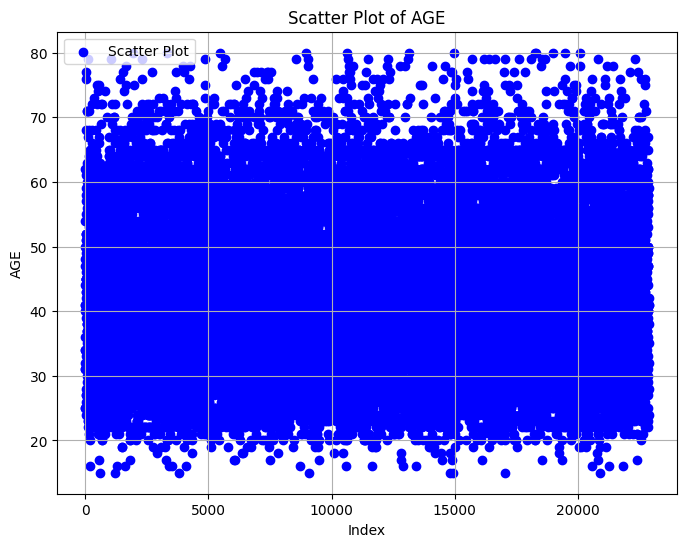

Linear Regression Model:
Intercept (beta0): 0.717535762765977
Slope (beta1): -0.005585287532414581
R-squared: 0.01752964364821341
Mean Squared Error: 0.24523137529631325

Logistic Regression Model:
Test Set Accuracy: 0.5363934426229509

Decision Tree Regression Model:
Mean Squared Error: 0.24308214208643814

k-NN Regression Model:
Mean Squared Error: 0.28902373978052737

Logistic Regression Model:
Intercept (beta0): [0.88526171]
Coefficients (beta1): [[-0.02291816]]
Regularization Strength (C): 1.0
Regularization Type (Penalty): l2
Solver: liblinear
Maximum Iterations: 100
Tolerance (Tol): 0.0001
Class Weight: None
Multi-Class Handling: auto
Fit Intercept: True


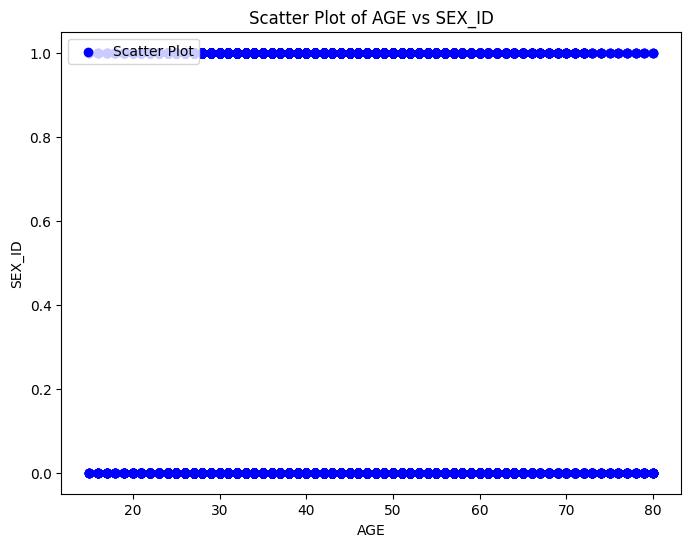

In [2]:

# Mukil LD BL.EN.U4CSE21109
df = pd.read_csv(r"user_list.csv")

df['PREF_NAME'].replace("", float("nan"), inplace=True)

user_list_jp = df['PREF_NAME'].unique()

user_list_en = ["NA", "Tokyo", "Aichi Prefecture", "Kanagawa Prefecture",
                "Hiroshima Prefecture", "Saitama Prefecture", "Nara Prefecture",
                "Ishikawa Prefecture", "Osaka prefecture",
                "Kumamoto Prefecture", "Fukuoka Prefecture", "Hokkaido", "Kyoto",
                "Akita", "Chiba Prefecture", "Nagasaki Prefecture",
                "Hyogo Prefecture", "Okinawa", "Mie", "Ibaraki Prefecture",
                "Kagoshima prefecture", "Miyagi Prefecture", "Shizuoka Prefecture",
                "Wakayama Prefecture", "Nagano Prefecture", "Okayama Prefecture",
                "Tochigi Prefecture", "Shiga Prefecture", "Toyama Prefecture",
                "Saga Prefecture", "Miyazaki Prefecture", "Iwate Prefecture",
                "Niigata Prefecture", "Oita Prefecture", "Yamaguchi Prefecture",
                "Gifu Prefecture", "Gunma Prefecture", "Fukushima Prefecture",
                "Ehime Prefecture", "Kagawa Prefecture", "Yamanashi Prefecture",
                "Kochi Prefecture", "Shimane Prefecture", "Tokushima Prefecture",
                "Fukui Prefecture", "Aomori Prefecture", "Yamagata Prefecture",
                "Tottori Prefecture"]

translation_user_list = pd.DataFrame({'Japanese': user_list_jp, 'PREF_NAME_en': user_list_en})

df = pd.merge(df, translation_user_list, left_on='PREF_NAME', right_on='Japanese', how='left')

df.rename(columns={'PREF_NAME': 'Japanese'}, inplace=True)

df.drop(columns=['Japanese'], inplace=True)

plt.figure(figsize=(8, 6))
x = range(len(df))
y = df['AGE']
plt.scatter(x, y, c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot of AGE')
plt.xlabel('Index')
plt.ylabel('AGE')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

df['SEX_ID'] = df['SEX_ID'].replace({'f': 1, 'm': 0})

x = df['AGE']
y = df['SEX_ID']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot of AGE vs SEX_ID')
plt.xlabel('AGE')
plt.ylabel('SEX_ID')
plt.legend(loc='upper left')

reg = LinearRegression().fit(x.values.reshape(-1, 1), y)

intercept = reg.intercept_
slope = reg.coef_[0]
r_squared = reg.score(x.values.reshape(-1, 1), y)
mse = mean_squared_error(y, reg.predict(x.values.reshape(-1, 1)))

X = df[['AGE']]
y = df['SEX_ID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(solver='liblinear', C=1.0, penalty='l2')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

y_tree_pred = tree_reg.predict(X)

mse_tree = mean_squared_error(y, y_tree_pred)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y)

y_knn_pred = knn_reg.predict(X)

mse_knn = mean_squared_error(y, y_knn_pred)

print("Linear Regression Model:")
print("Intercept (beta0):", intercept)
print("Slope (beta1):", slope)
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

print("\nLogistic Regression Model:")
print("Test Set Accuracy:", accuracy)

print("\nDecision Tree Regression Model:")
print("Mean Squared Error:", mse_tree)

print("\nk-NN Regression Model:")
print("Mean Squared Error:", mse_knn)

print("\nLogistic Regression Model:")
print("Intercept (beta0):", logistic_model.intercept_)
print("Coefficients (beta1):", logistic_model.coef_)
print("Regularization Strength (C):", logistic_model.C)
print("Regularization Type (Penalty):", logistic_model.penalty)
print("Solver:", logistic_model.solver)
print("Maximum Iterations:", logistic_model.max_iter)
print("Tolerance (Tol):", logistic_model.tol)
print("Class Weight:", logistic_model.class_weight)
print("Multi-Class Handling:", logistic_model.multi_class)
print("Fit Intercept:", logistic_model.fit_intercept)